# DECISION TREE REGRESSION (nonlinear and noncontinuous regression)

## INTRODUCTION
    First of all, i have to write my process.
    I follow five instruction for solving any data science problem:

    - Define the problem

    - Prepare Data / Data Preprocessing
        Get Data
        Data Cleaning/Wrangling
        Statistical Analysis
        Data Visualization
        Feature Selection/Scaling
        Data Transformation

    - Check Algorithms
        Train & Test Data
        Apply ML Algorithm
        Test
        Perform Measure
        Evaulate accuarcy of different algorithm

    - Improve Results
        Algorithm Tuning

    - Present Results
        Conclusion
        Presentation

## LOG

In [1]:
# Log
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='decision_tree.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

## IMPORT LIBRARY

In [2]:
#import the libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()

## IMPORT DATA

In [3]:
#import the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(10)
dataset.shape

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


(10, 3)

In [4]:
# information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
#show independent variable
X = dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
#show dependent variable
y = dataset.iloc[:, 2:3].values
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## MISSING DATA

In [7]:
#missing the data
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
# taking care of missing data

# first option is removed this line
# second option is replace mean, strategy=mean
# third option is replace median, strategy=median
# fourth option is replace most frequent (like single mode), strategy=most_frequent
# axis=0 for the column based, axis=1 for the row based

#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values='NaN', strategy='mean', axis=0) #help(Imputer)
#imputer = imputer.fit(X[:, 1:3])
#X[:,1:3] = imputer.transform(X[:, 1:3])
#X

In [9]:
#help(imputer)

## CATEGORICAL DATA

In [10]:
# No categorical data

#handle the categorical data with LabelEncoder abd OneHotEncoder
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelEncoder = LabelEncoder()
#X[:,3] = labelEncoder.fit_transform(X[:, 3])
#oneHotEncoder = OneHotEncoder(categorical_features = [3])
#X = oneHotEncoder.fit_transform(X).toarray()
#X

In [11]:
#avoid dummy variables trap, so eliminate one columns that it is into the dummy variables
#X = X[:, 1:]
#X

## STATISTIC

In [12]:
# some statistic information
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## VISUALIZATION

In [13]:
# time series analysis
# histogram
# density
# pdf
# cdf
# heatmap or corr matrix

## CORRELATION

In [14]:
# correlation
corr_all = dataset.corr()
corr_all

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


## SPLIT DATA

In [15]:
# This is unnecessary because our dataset is very small

#splitting dataset as test and train
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train
#X_test
#y_train
#y_test

## FEATURES SCALES

In [16]:
#features scale

pass

#no necessary

#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

#print ('Scaled_X : ')
#print (X)
#print ('-------------------------------------')
#print ('Scaled_y')
#print (y)

## FIT THE MODEL

In [17]:
#fitting the model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)
y_hat = regressor.predict(X)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [18]:
#help the model
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree.tree:

class DecisionTreeRegressor(BaseDecisionTree, sklearn.base.RegressorMixin)
 |  DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential splits,
 |      and "mae" for the mean abso

## VISUALIZATION

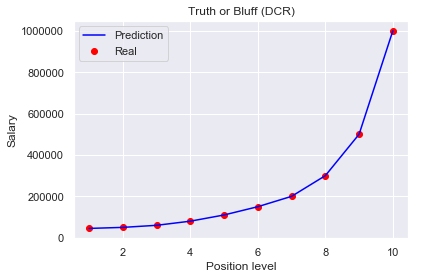

In [19]:
# Visualising the DCR results
_=plt.scatter(X, y, color='red', label='Real')
_=plt.plot(X, y_hat, color='blue', label='Prediction')
_=plt.title('Truth or Bluff (DCR)')
_=plt.xlabel('Position level')
_=plt.ylabel('Salary')
_=plt.legend(loc='best')
plt.show();

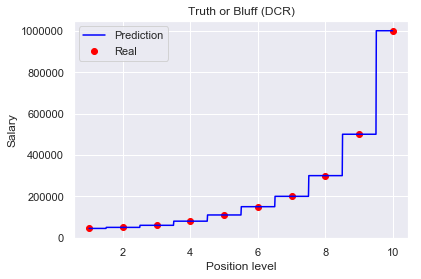

In [20]:
# Visualising the DCR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

_=plt.scatter(X, y, color='red', label='Real')
_=plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='Prediction')
_=plt.title('Truth or Bluff (DCR)')
_=plt.xlabel('Position level')
_=plt.ylabel('Salary')
_=plt.legend(loc='best')
plt.show();

## PRESENTATION

In [21]:
# Predicting a new result
# Predicting a new result with SVR_rbf Regression and SVR_Polynomial Regression
print('decision tree regression for 6.5           : ', regressor.predict([[6.5]]))
print('suppor vector regression with rbf for 6.5  :  [252789.13921624]')
print('linear regression for 6.5                  :  [330378.78787879]')
print('polynomial regression for 6.5              :  [158862.45265153]')

decision tree regression for 6.5           :  [150000.]
suppor vector regression with rbf for 6.5  :  [252789.13921624]
linear regression for 6.5                  :  [330378.78787879]
polynomial regression for 6.5              :  [158862.45265153]
